In [37]:
import pickle
import os
import numpy as np
import pandas as pd
from requests import get
from bs4 import BeautifulSoup
from time import sleep, time
from PIL import Image
from io import BytesIO, StringIO
from urllib.request import urlopen
from requests import get
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
import keras.backend as K

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

In [33]:
html = get('https://www.google.com/search?q=dung+beetle&rlz=1C1CHBF_enUS843US843&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjehKPamYvlAhXCxVkKHfnfAf8Q_AUIEygC&biw=1280&bih=610')
soup = BeautifulSoup(html.content, 'html.parser')

dungs = soup.findAll('img')

beetles = [beetle.get('src') for beetle in dungs]

In [34]:
from PIL import Image
from io import BytesIO, StringIO
from urllib.request import urlopen

dung_images = [Image.open(urlopen(beetle)) for beetle in beetles]

In [35]:
np_dungs = np.array(dung_images)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'JpegImageFile'

In [38]:
cetonia_images = open("cetonia.pkl", 'rb')
cetonia = pickle.load(cetonia_images, encoding='latin1')
np_cetonia = [np.array(beetle) for beetle in cetonia]
cetonia_images.close()

cuprea_images = open("images_loop3.pkl","rb")
cuprea = pickle.load(cuprea_images, encoding='latin1')

cuprea_images.close()

In [44]:
# np_cuprea = np.array(cuprea)
# np_cetonia = np.array(np_cetonia)

# np_cetonia = np_cetonia / 255
np_cuprea = cuprea / 255

np_dungs = dung_images / 255

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [184]:
cuprea_imags = []
for i, image in enumerate(cuprea):
    image = image.resize((100, 100))
    image = image.convert(mode='L')
    image = np.array(image)
    cuprea_imags.append(image)

In [185]:
dunga_imags = []
for i, image in enumerate(dung_images):
    image = image.resize((100, 100))
    image = image.convert(mode='L')
    image = np.array(image)
    dunga_imags.append(image)

In [186]:
dunga_imags = np.asarray(dunga_imags)
cuprea_imags = np.asarray(cuprea_imags)

In [187]:
np_cuprea = cuprea_imags / 255
np_dungs = dunga_imags / 255

In [188]:
images = np.concatenate([dunga_imags, cuprea_imags], axis=0)
labels = np.concatenate([np.zeros(20), np.ones(20)], axis=0)

In [213]:
x_train, x_test, y_train, y_test = train_test_split(cuprea_imags, np.ones(20), test_size=0.1)

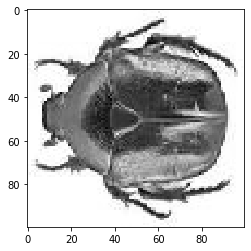

In [215]:
plt.imshow(np_cuprea[9], cmap='gray')

In [216]:
x_train = x_train.reshape(-1, 10000)
x_test = x_test.reshape(-1, 10000)

In [217]:
# this is our input placeholder
input_img = Input(shape=(10000,))

# "encoded" is the encoded representation of the input
encoded = Dense(4000, activation='relu')(input_img)
encoded = Dense(2000, activation='relu')(encoded)
encoded = Dense(1000, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(4000, activation='relu')(decoded)
decoded = Dense(10000)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [218]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [219]:
autoencoder.compile(optimizer='adam', loss='mse')

In [206]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [220]:
train_history = autoencoder.fit(x_train, x_train, epochs=4, batch_size=2, 
                                validation_data=(x_test, x_test), callbacks=[estop])

Train on 18 samples, validate on 2 samples
Epoch 1/4
18/18 [==============================] - 16s 887ms/step - loss: 30798.3770 - val_loss: 4378.2041
Epoch 2/4
18/18 [==============================] - 12s 655ms/step - loss: 7374.7347 - val_loss: 2486.7900
Epoch 3/4
18/18 [==============================] - 12s 653ms/step - loss: 6290.9922 - val_loss: 8538.6650
Epoch 4/4
18/18 [==============================] - 12s 650ms/step - loss: 5230.4800 - val_loss: 3306.4058


In [221]:
pred = autoencoder.predict(x_test)

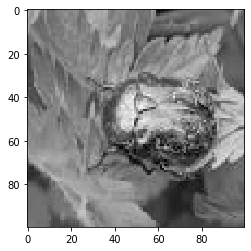

In [222]:
plt.imshow(x_test[0].reshape(100, 100), cmap='gray')

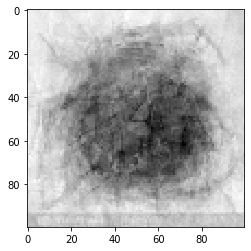

In [223]:
plt.imshow(pred[0].reshape(100, 100), cmap='gray')

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

# Opening a file from computer using cv2 change BGR to RBG and show it using matplotlib

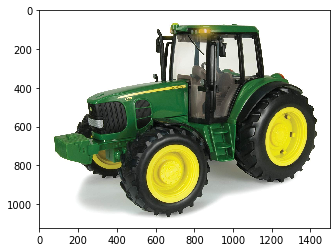

In [7]:
# turns an image to pixels
a1 = cv2.imread(r'C:\Users\GILOR\Desktop\tractor.jpg')

# change colors from BGR to RGB
a2 = a1[..., ::-1]
plt.imshow(a2)

# using cv2 to convert an RGB image to grayscale image

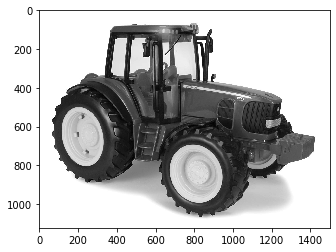

In [10]:
# gray scale image
gray_img = cv2.cvtColor(a1, cv2.COLOR_BGR2GRAY)
gray_img = gray_img[..., ::-1]
plt.imshow(gray_img, cmap='gray')

# resizing an an image using cv2

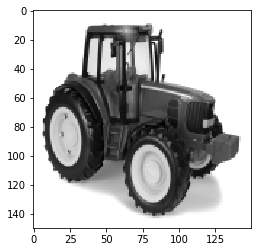

In [11]:
width = 150
height = 150
dim = (width, height)

resized = cv2.resize(gray_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized, cmap='gray')

# load an image (jpeg only?) from the internet and open it

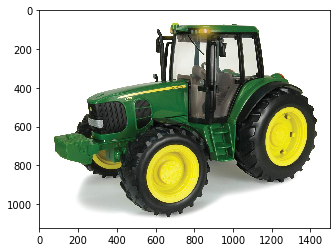

In [31]:
import numpy as np
import requests
from io import BytesIO
url = 'https://images-na.ssl-images-amazon.com/images/I/81iTjdmEEzL._SL1500_.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

# Resizing  and gray scaling using the pillow library

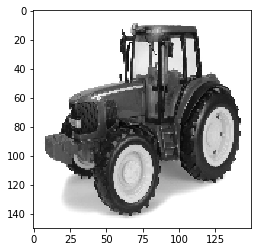

In [49]:
resized2 = img.resize(dim)
resized2_gray = resized2.convert(mode='L')
plt.imshow(resized2_gray, cmap ='gray')

# Gray Scale + resize and image file using CV2

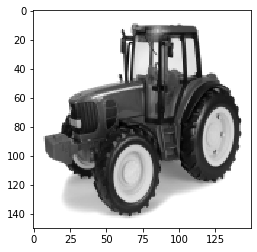

In [44]:
import numpy as np
import matplotlib.pyplot as plt

### the gray scale formula
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(a2)
resized2 = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized2, cmap='gray')
plt.show()

# covert image to numpy array